In [39]:
import keras
from keras.layers import Dense, Dropout, Activation, Flatten,Dropout, InputLayer
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
(X_train, y_train),(X_test, y_test) =  keras.datasets.fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_label = dict(zip(range(10), class_names))
#from keras.utils import np_utils
#hot_y = np_utils.to_categorical(encoded_y)

In [46]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [136]:
%%time
neurons=64
from keras import optimizers
from keras import  metrics
from keras import losses

net = keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(neurons,activation='relu',kernel_initializer='normal'),
    Dense(neurons,activation='relu',kernel_initializer='normal'),
    Dropout(0.1),
    Dense(neurons,activation='relu',kernel_initializer='normal'),
    Dropout(0.4),
    Dense(10,activation='softmax')   
])
net.compile(optimizer=optimizers.SGD(learning_rate=0.001),
              loss=losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[metrics.SparseCategoricalAccuracy()])

netstory=net.fit(X_train,y_train,
       epochs=32,
       batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
        )
#del netstory, net

Epoch 1/32
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0749 - sparse_categorical_accuracy: 0.3817 - val_loss: 1.8761 - val_sparse_categorical_accuracy: 0.5817
Epoch 2/32
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8746 - sparse_categorical_accuracy: 0.5855 - val_loss: 1.7849 - val_sparse_categorical_accuracy: 0.6752
Epoch 3/32
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8000 - sparse_categorical_accuracy: 0.6605 - val_loss: 1.7759 - val_sparse_categorical_accuracy: 0.6836
Epoch 4/32
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7851 - sparse_categorical_accuracy: 0.6757 - val_loss: 1.7691 - val_sparse_categorical_accuracy: 0.6894
Epoch 5/32
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7783 - sparse_categorical_accuracy: 0.6824 - val_loss: 1.7673 - val_sparse_categorical_accuracy: 0.6933
Epoch 6/32
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7714 - spars

In [139]:
from tensorflow.python.keras.callbacks import History
import matplotlib.pyplot as plt
def plot_training_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['sparse_categorical_accuracy'])
    ax1.plot(story.history['val_sparse_categorical_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'test_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    #ax1.set_ylim(0.9,1)
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    #ax2.set_ylim(0,0.1)

    plt.show()
    

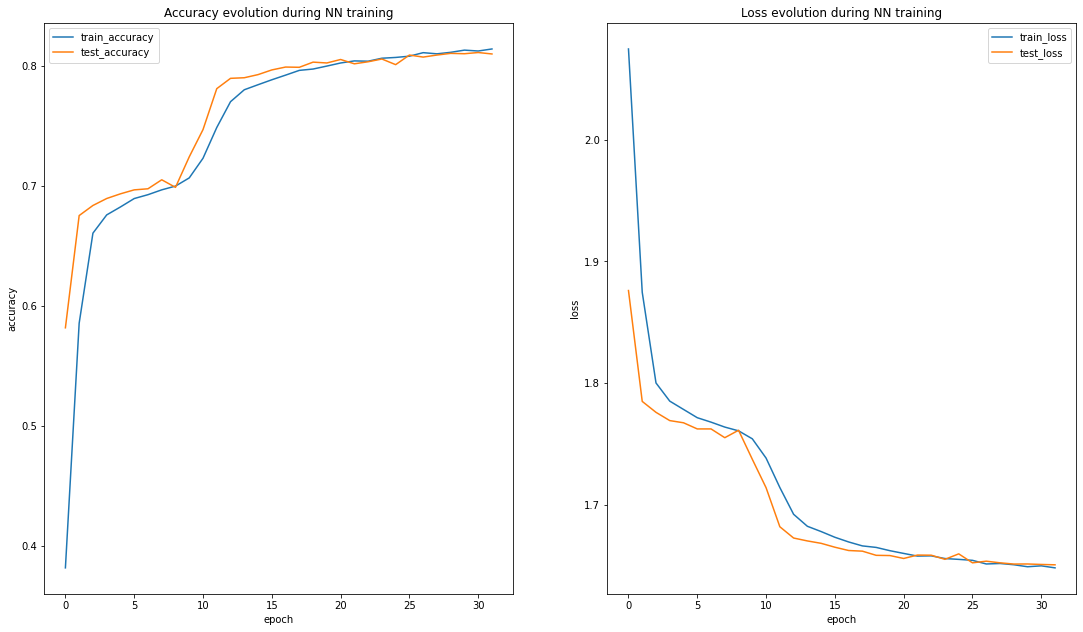

In [140]:
plot_training_history(netstory)

In [159]:
from sklearn.metrics import confusion_matrix
yhat=net.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [162]:
cm=confusion_matrix(y_test,yhat)

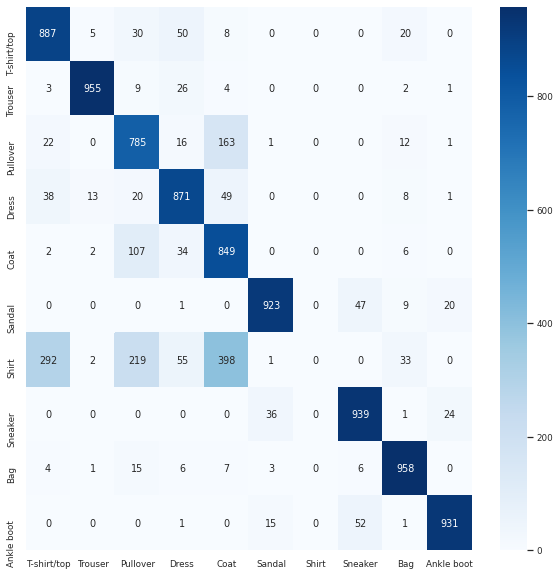

In [173]:
import seaborn as sn
import pandas as pd


df_cm = pd.DataFrame(cm, class_names, class_names)
plt.figure(figsize=(10,10))
sn.set(font_scale=.8) # for label size
sn.heatmap(df_cm, annot=True,cmap='Blues',fmt='g') # font size

plt.show()

### Conclusion 
Shirt gets badly misclassified.